# 파일 불러오기
- 날짜 없는 원본 파일 사용

In [1]:
import pandas as pd

# Load the CSV file
file_path = "./Final Results Extended.csv"
df = pd.read_csv(file_path)
df.head()

,Time_Now,Blanking_Util,Blanking_SKU1_Queue,Blanking_SKU2_Queue,Blanking_SKU3_Queue,Blanking_SKU4_Queue,Press1_Util,Press2_Util,Press3_Util,Press4_Util,...,SKU3_NVA_Time,SKU3_Transport_Time,SKU3_Wait_Time,SKU3_Other_Time,SKU4_VA_Time,SKU4_NVA_Time,SKU4_Transport_Time,SKU4_Wait_Time,SKU4_Other_Time,Blanking_Queue
0,24,0.846367,0.045715,0.056373,0.055737,0.035849,0.410297,0.434561,0.481388,0.399992,...,0.0,0.537617,0.453650,0.0,1.523338,0.0,0.536243,0.473453,0.0,58.361452
1,24,0.851097,0.051937,0.052934,0.038512,0.042248,0.455471,0.454445,0.387975,0.442986,...,0.0,0.536764,0.473677,0.0,1.523344,0.0,0.534992,0.464380,0.0,62.830599
2,24,0.846115,0.052210,0.047499,0.043181,0.040979,0.496717,0.450816,0.417308,0.352829,...,0.0,0.535925,0.424090,0.0,1.523403,0.0,0.535077,0.475330,0.0,59.365867
3,24,0.841306,0.051769,0.035436,0.046788,0.052362,0.433749,0.363004,0.443909,0.456036,...,0.0,0.535232,0.430992,0.0,1.523381,0.0,0.533233,0.463801,0.0,56.698528
4,24,0.859599,0.045874,0.046802,0.044507,0.057210,0.418329,0.396826,0.499273,0.472454,...,0.0,0.538142,0.502614,0.0,1.523363,0.0,0.537223,0.449320,0.0,65.784631


# 데이터 전처리

## 상수컬럼 및 전부 0인 컬럼 제거
- Time_Now에 동일한 24 값 -> 제거
- 결과적으로 22개 컬럼 제거
- Queue 변수 중 제거된 거 : 'Paint1_Queue', 'Paint2_Queue', 'Cell1_Queue', 'Cell2_Queue', 'Cell3_Queue', 'Cell4_Queue'
- Cell별 SKU 생산량 변수 중 제거된 거 : 'c_Cell1_SKU3', 'c_Cell2_SKU1', 'c_Cell2_SKU3', 'c_Cell3_SKU1', 'c_Cell3_SKU4', 'c_Cell4_SKU1', 'c_Cell4_SKU2'

In [2]:
# =========================
# 1. 상수컬럼 및 전부 0인 컬럼 제거
# =========================

# (1) 상수컬럼: 데이터가 모두 같은 값인 컬럼
const_cols = [col for col in df.columns if df[col].nunique() == 1]

# (2) 전부 0인 컬럼
zero_cols = [col for col in df.columns if (df[col] == 0).all()]

# 합치기 (중복 제거)
drop_cols = list(set(const_cols + zero_cols))

print(f"🗑 제거 대상 컬럼 수: {len(drop_cols)}개")
print(drop_cols)

# 실제 제거
df = df.drop(columns=drop_cols)

print(f"✅ 제거 후 컬럼 수: {df.shape[1]}")

🗑 제거 대상 컬럼 수: 22개
['Paint2_Queue', 'SKU2_NVA_Time', 'SKU1_Other_Time', 'c_Cell2__SKU1', 'SKU4_NVA_Time', 'c_Cell4__SKU1', 'c_Cell3__SKU1', 'Cell1_Queue', 'Paint1_Queue', 'Cell4_Queue', 'c_Cell4__SKU2', 'c_Cell1__SKU3', 'SKU2_Other_Time', 'Cell2_Queue', 'SKU3_Other_Time', 'c_Cell3__SKU4', 'c_Cell2__SKU3', 'Time_Now', 'SKU1_NVA_Time', 'Cell3_Queue', 'SKU4_Other_Time', 'SKU3_NVA_Time']
✅ 제거 후 컬럼 수: 56


## 결측치 확인 -> 1~3개씩 존재 => 해당 행 drop (행 3개 제거)

In [3]:
# =========================
# 2. 결측치 확인
# =========================
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]

if missing_summary.empty:
    print("✅ 결측치 없음")
else:
    print("⚠️ 결측치 요약:")
    print(missing_summary)

⚠️ 결측치 요약:
Blanking_SKU4_Queue        1
Press1_Util                1
Press2_Util                1
Press3_Util                1
Press4_Util                1
Press1_Queue               1
Press2_Queue               1
Press3_Queue               1
Press4_Queue               1
Cell1_Util                 1
Cell2_Util                 1
Cell3_Util                 1
Cell4_Util                 1
Warehouse1_Queue           1
Warehouse_2_Queue          1
Warehouse_3_Queue          1
Warehouse_4_Queue          1
c_Cycle1                   1
c_Cycle2                   1
c_Cycle3                   1
c_Cycle4                   1
c_Cell1_SKU1               1
c_Cell1__SKU2              1
c_Cell1__SKU4              1
c_Cell2__SKU2              1
c_Cell2__SKU4              1
c_Cell3__SKU2              1
c_Cell3__SKU3              1
c_Cell4__SKU3              1
c_Cell4__SKU4              1
Paint1_Util                1
Paint2_Util                1
Quality_Util               1
Quality_Queue              1
For

In [4]:
# =========================
# 3. 결측치 제거
# =========================
if not missing_summary.empty:
    before = df.shape[0]
    df = df.dropna()  # 결측치가 하나라도 있는 행 제거
    after = df.shape[0]
    print(f"✅ 결측치가 있는 행 {before - after}개 제거 완료 (남은 행: {after})")

print()
missing_summary2 = df.isnull().sum()
missing_summary2 = missing_summary2[missing_summary2 > 0]
print(missing_summary2)

✅ 결측치가 있는 행 3개 제거 완료 (남은 행: 132673)

Series([], dtype: int64)


# Warehouse Queue -> 네이밍을 Cell Queue 로 변경 (with 넘버링 매핑)
- 이름 변경 매핑: {'Warehouse1_Queue': 'Cell1_Queue', 'Warehouse_2_Queue': 'Cell2_Queue', 'Warehouse_3_Queue': 'Cell3_Queue', 'Warehouse_4_Queue': 'Cell4_Queue'}

In [5]:
# =========================
# 1) Warehouse Queue 컬럼 찾기
# =========================
warehouse_cols = [c for c in df.columns if "warehouse" in c.lower() and "queue" in c.lower()]
print("Warehouse Queue cols:", warehouse_cols)

# =========================
# 2) Warehouse 번호 → Cell 번호로 변환
# =========================
rename_map = {}
for w in warehouse_cols:
    # 숫자 추출 (예: Warehouse1_Queue → 1)
    num = ''.join(filter(str.isdigit, w))
    if num:
        new_name = f"Cell{num}_Queue"
        rename_map[w] = new_name

# =========================
# 3) 컬럼명 변경
# =========================
df = df.rename(columns=rename_map)

print("✅ 이름 변경 매핑:", rename_map)
print("변경 후 Queue 관련 컬럼:", [c for c in df.columns if "queue" in c.lower()])

Warehouse Queue cols: ['Warehouse1_Queue', 'Warehouse_2_Queue', 'Warehouse_3_Queue', 'Warehouse_4_Queue']
✅ 이름 변경 매핑: {'Warehouse1_Queue': 'Cell1_Queue', 'Warehouse_2_Queue': 'Cell2_Queue', 'Warehouse_3_Queue': 'Cell3_Queue', 'Warehouse_4_Queue': 'Cell4_Queue'}
변경 후 Queue 관련 컬럼: ['Blanking_SKU1_Queue', 'Blanking_SKU2_Queue', 'Blanking_SKU3_Queue', 'Blanking_SKU4_Queue', 'Press1_Queue', 'Press2_Queue', 'Press3_Queue', 'Press4_Queue', 'Cell1_Queue', 'Cell2_Queue', 'Cell3_Queue', 'Cell4_Queue', 'Quality_Queue', 'Forklift_Blanking_Queue', 'Forklift_Press_Queue', 'Forklift_Assembly_Queue', 'Blanking_Queue']


# Target 컬럼 생성

## 전체 기준 병목 파악 -> 새 컬럼에 추가 (Bottleneck_actual , Bottleneck_actual_val)

In [6]:
# =========================
# 1) Queue 컬럼 찾기 (대소문자 무시)
# =========================
queue_cols = [col for col in df.columns if "queue" in col.lower()]

print(f"Queue 관련 컬럼 수: {len(queue_cols)}")
print(queue_cols[:10])  # 앞 10개만 확인

# =========================
# 2) 병목 공정 컬럼 생성
# =========================
# 각 행에서 queue 값이 가장 큰 컬럼명
df["Bottleneck_actual"] = df[queue_cols].idxmax(axis=1)

# 해당 queue의 실제 최대값도 같이 기록하고 싶다면
df["Bottleneck_val"] = df[queue_cols].max(axis=1)

# =========================
# 3) 결과 확인
# =========================
print(df[["Bottleneck_actual", "Bottleneck_val"]].tail())

Queue 관련 컬럼 수: 17
['Blanking_SKU1_Queue', 'Blanking_SKU2_Queue', 'Blanking_SKU3_Queue', 'Blanking_SKU4_Queue', 'Press1_Queue', 'Press2_Queue', 'Press3_Queue', 'Press4_Queue', 'Cell1_Queue', 'Cell2_Queue']
              Bottleneck_actual  Bottleneck_val
132670  Forklift_Blanking_Queue      153.012984
132671              Cell1_Queue      185.031493
132672              Cell1_Queue      302.349198
132673              Cell1_Queue      295.667368
132674              Cell1_Queue      166.628981


In [7]:
# Bottleneck 컬럼의 빈도 계산
bottleneck_counts = df["Bottleneck_actual"].value_counts().head(10)

bottleneck_counts

Bottleneck_actual
Cell1_Queue                77629
Forklift_Blanking_Queue    53681
Cell3_Queue                 1307
Cell4_Queue                   36
Forklift_Press_Queue           9
Press4_Queue                   6
Press2_Queue                   5
Name: count, dtype: int64

## 주요 공정 단계(블랭킹, 프레스, 조립셀) 기준 병목 파악 -> 새 컬럼에 추가
- Bottleneck_actual_Blanking , Bottleneck_actual_Press , Bottleneck_actual_Cell
- Bottleneck_val_Blanking , Bottleneck_val_Press , Bottleneck_val_Cell

In [8]:
# ================================
# 11. 공정별 실제 병목 레이블 & 값 생성
# ================================
stage_groups = {
    "Blanking": ["Blanking_SKU1_Queue", "Blanking_SKU2_Queue",
                 "Blanking_SKU3_Queue", "Blanking_SKU4_Queue"],
    "Press":    ["Press1_Queue", "Press2_Queue", "Press3_Queue", "Press4_Queue"],
    "Cell":     ["Cell1_Queue", "Cell2_Queue", "Cell3_Queue", "Cell4_Queue"]
}

for stage, cols in stage_groups.items():
    # 병목 컬럼명 (어느 라인/설비가 병목인지)
    df[f"Bottleneck_actual_{stage}"] = df[cols].idxmax(axis=1)
    # 병목 값 (queue 크기)
    df[f"Bottleneck_val_{stage}"] = df[cols].max(axis=1)

# ================================
# 12. 결과 확인
# ================================
check_cols = [c for c in df.columns if c.startswith("Bottleneck_")]
print(df[check_cols].head())

         Bottleneck_actual  Bottleneck_val Bottleneck_actual_Blanking  \
0  Forklift_Blanking_Queue      157.256741        Blanking_SKU2_Queue   
1  Forklift_Blanking_Queue      166.488725        Blanking_SKU2_Queue   
2              Cell1_Queue      335.401556        Blanking_SKU1_Queue   
3  Forklift_Blanking_Queue      147.448407        Blanking_SKU4_Queue   
4  Forklift_Blanking_Queue      150.397600        Blanking_SKU4_Queue   

   Bottleneck_val_Blanking Bottleneck_actual_Press  Bottleneck_val_Press  \
0                 0.056373            Press2_Queue             65.273786   
1                 0.052934            Press1_Queue             74.772823   
2                 0.052210            Press2_Queue             72.901066   
3                 0.052362            Press1_Queue             65.091192   
4                 0.057210            Press1_Queue             65.075312   

  Bottleneck_actual_Cell  Bottleneck_val_Cell  
0            Cell1_Queue            98.155568  
1       

## 제품군(SKU) 기준 병목 파악 -> 새 컬럼에 추가
- Bottleneck_actual_SKU1 , Bottleneck_actual_SKU2 , Bottleneck_actual_SKU3 , Bottleneck_actual_SKU4
- Bottleneck_val_SKU1 , Bottleneck_val_SKU2 , Bottleneck_val_SKU3, Bottleneck_val_SKU4

### 컬럼명 맞추기

In [9]:
# =========================
# 컬럼명 정규화: 언더스코어 여러 개 → 1개로 통일
# =========================
df.columns = df.columns.str.replace(r"__+", "_", regex=True)

# 확인
for sku in ["SKU1","SKU2","SKU3","SKU4"]:
    related_cols = [c for c in df.columns if f"Cell" in c and sku in c]
    print(sku, related_cols)

SKU1 ['c_Cell1_SKU1']
SKU2 ['c_Cell1_SKU2', 'c_Cell2_SKU2', 'c_Cell3_SKU2']
SKU3 ['c_Cell3_SKU3', 'c_Cell4_SKU3']
SKU4 ['c_Cell1_SKU4', 'c_Cell2_SKU4', 'c_Cell4_SKU4']


### 조립셀 Queue 값 -> SKU별로 분배
- 각 Cell Queue 전체량을 SKU별 담당 비율에 따라 나눠서, SKU별 Cell Queue를 생성 -> SKU별로 여러 Cell에서 받은 몫을 합쳐 최종 SKU Cell Queue를 계산
- 각 행에 대해 동적으로 SKU별 분배 수행

In [10]:
for sku in ["SKU1","SKU2","SKU3","SKU4"]:
    related_cols = [c for c in df.columns if f"_{sku}" in c and "c_Cell" in c]
    print(sku, related_cols)

SKU1 ['c_Cell1_SKU1']
SKU2 ['c_Cell1_SKU2', 'c_Cell2_SKU2', 'c_Cell3_SKU2']
SKU3 ['c_Cell3_SKU3', 'c_Cell4_SKU3']
SKU4 ['c_Cell1_SKU4', 'c_Cell2_SKU4', 'c_Cell4_SKU4']


In [11]:
# ================================
# 2. SKU 경로 정의
# ================================
sku_paths = {
    "SKU1": {"blanking": "Blanking_SKU1_Queue","press": "Press1_Queue"},
    "SKU2": {"blanking": "Blanking_SKU2_Queue","press": "Press2_Queue"},
    "SKU3": {"blanking": "Blanking_SKU3_Queue","press": "Press3_Queue"},
    "SKU4": {"blanking": "Blanking_SKU4_Queue","press": "Press4_Queue"},
}

# ================================
# 3. Cell → SKU 비율 기반 분배
# ================================
sku_cell_vals = {sku: pd.Series(0, index=df.index) for sku in sku_paths}

for cell_num in range(1, 5):  # Cell1 ~ Cell4
    cell_col = f"Cell{cell_num}_Queue"
    
    if cell_col not in df.columns:
        continue
    
    # 해당 Cell Queue 값
    cell_vals = df[cell_col]
    
    for sku in sku_paths.keys():
        ratio_col = f"c_Cell{cell_num}_{sku}"
        if ratio_col in df.columns:
            # SKU별 Cell Queue = Cell Queue × 비율
            sku_cell_vals[sku] += cell_vals * df[ratio_col]

# ================================
# 4. 결과 DataFrame 구성 (컬럼명 변경)
# ================================
sku_cell_df = pd.DataFrame({
    f"Cell_{sku}_Queue": vals for sku, vals in sku_cell_vals.items()
})

print("=== SKU별로 분배된 Cell Queue (앞부분 10행) ===")
print(sku_cell_df.head(10))

# 원래 df에 붙이고 싶다면:
df = pd.concat([df, sku_cell_df], axis=1)

=== SKU별로 분배된 Cell Queue (앞부분 10행) ===
   Cell_SKU1_Queue  Cell_SKU2_Queue  Cell_SKU3_Queue  Cell_SKU4_Queue
0     1.370939e+06     1.192535e+06     1.247366e+06     8.856453e+05
1     2.451033e+06     1.958747e+06     9.126624e+05     1.182048e+06
2     5.568672e+06     3.817909e+06     9.283182e+05     1.242360e+06
3     1.647598e+06     1.114051e+06     1.090078e+06     1.048065e+06
4     1.553549e+06     1.232362e+06     1.476219e+06     1.102118e+06
5     2.101007e+06     1.931448e+06     1.167199e+06     1.028449e+06
6     1.851074e+06     1.886183e+06     6.287604e+05     8.966812e+05
7     2.972045e+06     2.248654e+06     1.170633e+06     1.487739e+06
8     5.720726e+06     4.591313e+06     9.949638e+05     1.545606e+06
9     5.471222e+06     3.388148e+06     7.908985e+05     1.160693e+06


In [13]:
# ================================
# 7. SKU별 병목 공정 예측
# ================================
sku_paths = {
    "SKU1": {"blanking": "Blanking_SKU1_Queue","press": "Press1_Queue", "cell": "Cell_SKU1_Queue"},
    "SKU2": {"blanking": "Blanking_SKU2_Queue","press": "Press2_Queue", "cell": "Cell_SKU2_Queue"},
    "SKU3": {"blanking": "Blanking_SKU3_Queue","press": "Press3_Queue", "cell": "Cell_SKU3_Queue"},
    "SKU4": {"blanking": "Blanking_SKU4_Queue","press": "Press4_Queue", "cell": "Cell_SKU4_Queue"},
}

for sku, paths in sku_paths.items():
    # 각 SKU별 병목 후보 Stage 값 모으기
    stage_df = df[[paths["blanking"], paths["press"], paths["cell"]]].copy()
    stage_df.columns = ["Blanking", "Press", "Cell"]  # 축 이름 단순화
    
    # 각 시점별 최대값 컬럼명 → 병목 공정
    df[f"Bottleneck_actual_{sku}"] = stage_df.idxmax(axis=1)

    # 각 시점별 병목 수치 (최대값)
    df[f"Bottleneck_val_{sku}"] = stage_df.max(axis=1)

# ================================
# 8. 결과 확인
# ================================
print(df[[c for c in df.columns if c.startswith("Bottleneck_actual_")]].head())
print(df[[c for c in df.columns if c.startswith("Bottleneck_val_")]].head())

  Bottleneck_actual_Blanking Bottleneck_actual_Press Bottleneck_actual_Cell  \
0        Blanking_SKU2_Queue            Press2_Queue            Cell1_Queue   
1        Blanking_SKU2_Queue            Press1_Queue            Cell1_Queue   
2        Blanking_SKU1_Queue            Press2_Queue            Cell1_Queue   
3        Blanking_SKU4_Queue            Press1_Queue            Cell1_Queue   
4        Blanking_SKU4_Queue            Press1_Queue            Cell1_Queue   

  Bottleneck_actual_SKU1 Bottleneck_actual_SKU2 Bottleneck_actual_SKU3  \
0                   Cell                   Cell                   Cell   
1                   Cell                   Cell                   Cell   
2                   Cell                   Cell                   Cell   
3                   Cell                   Cell                   Cell   
4                   Cell                   Cell                   Cell   

  Bottleneck_actual_SKU4  
0                   Cell  
1                   Cell  

# 랜덤 분할 - Train 70 : Val 15 : Test 15

In [16]:
from sklearn.model_selection import train_test_split

train_val_df, test_df = train_test_split(df, test_size=0.15, random_state=42, shuffle=True)
train_df, val_df = train_test_split(train_val_df, test_size=0.1765, random_state=42, shuffle=True)
# 0.1765 ≈ 15% / 85%

print(f"Train: {train_df.shape}, Val: {val_df.shape}, Test: {test_df.shape}")

Train: (92867, 76), Val: (19905, 76), Test: (19901, 76)


In [17]:
# 저장 경로 지정 (원하는 폴더로 바꾸세요)
train_path = "./bottleneck_train.csv"
val_path   = "./bottleneck_val.csv"
test_path  = "./bottleneck_test.csv"

# CSV 저장 (인덱스 제외)
train_df.to_csv(train_path, index=False, encoding="utf-8-sig")
val_df.to_csv(val_path, index=False, encoding="utf-8-sig")
test_df.to_csv(test_path, index=False, encoding="utf-8-sig")

print("✅ CSV 저장 완료")
print(f"Train → {train_path} ({train_df.shape})")
print(f"Val   → {val_path} ({val_df.shape})")
print(f"Test  → {test_path} ({test_df.shape})")

✅ CSV 저장 완료
Train → ./bottleneck_train.csv ((92867, 76))
Val   → ./bottleneck_val.csv ((19905, 76))
Test  → ./bottleneck_test.csv ((19901, 76))


# 독립변수 분리
- 전체 기준 병목 예측
    - 분류 : Bottleneck_actual
    - 회귀 : Bottleneck_actual_val 
- 공정 단계 기준 병목 예측
    - 분류 : Bottleneck_actual_Blanking , Bottleneck_actual_Press , Bottleneck_actual_Cell
    - 회귀 : Bottleneck_val_Blanking , Bottleneck_val_Press , Bottleneck_val_Cell 
- 제품군(SKU) 기준 병목 예측
    - 분류 : Bottleneck_actual_SKU1 , Bottleneck_actual_SKU2 , Bottleneck_actual_SKU3 , Bottleneck_actual_SKU4
    - 회귀 : Bottleneck_val_SKU1 , Bottleneck_val_SKU2 , Bottleneck_val_SKU3, Bottleneck_val_SKU4

In [18]:
# 타깃 후보 컬럼 전부 정리
target_cols = [
    # 전체 기준
    "Bottleneck_actual", "Bottleneck_val",
    # 공정 단계 기준
    "Bottleneck_actual_Blanking", "Bottleneck_actual_Press", "Bottleneck_actual_Cell",
    "Bottleneck_val_Blanking", "Bottleneck_val_Press", "Bottleneck_val_Cell",
    # SKU 기준
    "Bottleneck_actual_SKU1", "Bottleneck_actual_SKU2", "Bottleneck_actual_SKU3", "Bottleneck_actual_SKU4",
    "Bottleneck_val_SKU1", "Bottleneck_val_SKU2", "Bottleneck_val_SKU3", "Bottleneck_val_SKU4"
]

# 독립변수(X)는 이 타깃 후보들을 제외한 것들만
X_train = train_df.drop(columns=[c for c in target_cols if c in train_df.columns])
X_val   = val_df.drop(columns=[c for c in target_cols if c in val_df.columns])
X_test  = test_df.drop(columns=[c for c in target_cols if c in test_df.columns])

print("✅ 독립변수 컬럼 수:", X_train.shape[1])
print("예시 컬럼:", X_train.columns[:10].tolist())

✅ 독립변수 컬럼 수: 60
예시 컬럼: ['Blanking_Util', 'Blanking_SKU1_Queue', 'Blanking_SKU2_Queue', 'Blanking_SKU3_Queue', 'Blanking_SKU4_Queue', 'Press1_Util', 'Press2_Util', 'Press3_Util', 'Press4_Util', 'Press1_Queue']


## 추가 전처리 필요한가?

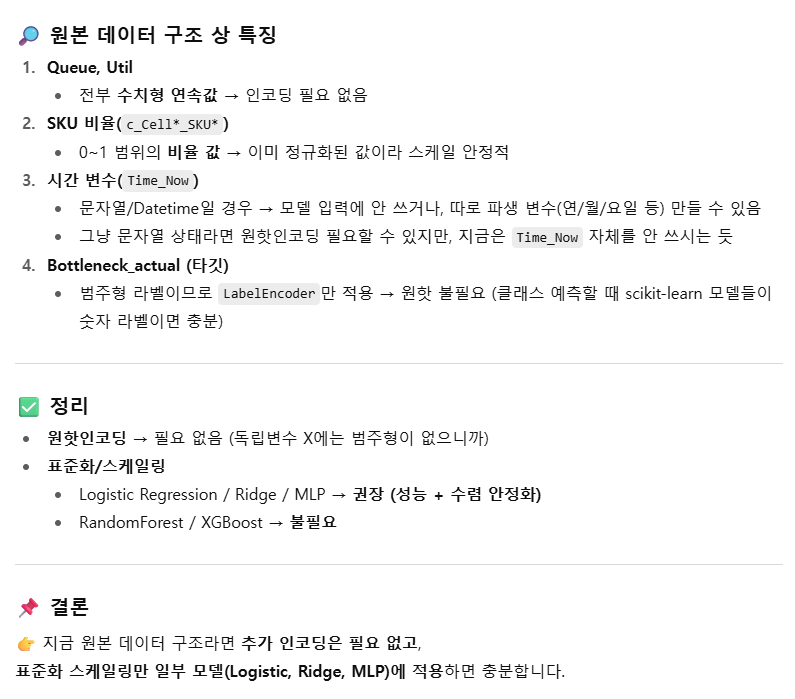

# 전체 기준 병목 예측 모델링
- 분류 : Bottleneck_actual
- 회귀 : Bottleneck_actual_val 

### 추가 처리
- 트리 기반 모델(RandomForest, XGB) → 그대로 둠 (스케일링 불필요)
- Logistic / Ridge / MLP → StandardScaler 적용
- MLP → PyTorch 기반 GPU 학습

In [23]:
# =========================
# 분류: Bottleneck_actual
# =========================
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import joblib
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Using device:", device)

# ----- 타깃 준비 -----
y_train_cls = train_df["Bottleneck_actual"]
y_val_cls   = val_df["Bottleneck_actual"]
y_test_cls  = test_df["Bottleneck_actual"]

# 라벨 인코딩
le = LabelEncoder()
y_train_cls = le.fit_transform(y_train_cls)
y_val_cls   = le.transform(y_val_cls)
y_test_cls  = le.transform(y_test_cls)

# ----- Torch MLP 정의 -----
class TorchMLPClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, num_classes=None):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.out = nn.Linear(hidden_dim // 2, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(self.relu(self.fc2(x)))
        return self.out(x)

def train_torch_mlp_cls(X_train, y_train, X_val, y_val, num_classes, epochs=20, lr=1e-3):
    model = TorchMLPClassifier(X_train.shape[1], num_classes=num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    X_train_t = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_t = torch.tensor(y_train, dtype=torch.long).to(device)
    X_val_t   = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_t   = torch.tensor(y_val, dtype=torch.long).to(device)

    for epoch in range(1, epochs + 1):
        model.train()
        optimizer.zero_grad()
        out = model(X_train_t)
        loss = criterion(out, y_train_t)
        loss.backward()
        optimizer.step()

        # 진행률 + 손실 출력
        if epoch % 2 == 0 or epoch == epochs:
            model.eval()
            with torch.no_grad():
                val_out = model(X_val_t)
                val_loss = criterion(val_out, y_val_t)
            print(f"[Epoch {epoch}/{epochs}] Train Loss={loss.item():.4f}, Val Loss={val_loss.item():.4f}")
    return model

# ----- 모델 정의 -----
cls_models = {
    "Logistic": make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42, verbose=1),
    "XGBoost": XGBClassifier(n_estimators=500, learning_rate=0.1,
                             random_state=42, tree_method="hist", verbose=1),
    "TorchMLP": "pytorch"
}

# ----- 실행 + 결과 저장 -----
results_cls = []

print("\n=== Classification Results (Bottleneck_actual) ===")
for name, model in cls_models.items():
    if name == "TorchMLP":
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled   = scaler.transform(X_val)
        X_test_scaled  = scaler.transform(X_test)

        torch_mlp = train_torch_mlp_cls(
            X_train_scaled, y_train_cls, X_val_scaled, y_val_cls,
            num_classes=len(np.unique(y_train_cls)), epochs=20
        )

        torch_mlp.eval()
        with torch.no_grad():
            X_test_t = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
            logits = torch_mlp(X_test_t)
            y_pred = torch.argmax(logits, axis=1).cpu().numpy()

        acc = accuracy_score(y_test_cls, y_pred)
        f1 = f1_score(y_test_cls, y_pred, average="macro", labels=range(len(le.classes_)))
        bal_acc = balanced_accuracy_score(y_test_cls, y_pred)
        print(f"{name:12s} | Acc={acc:.3f} | F1={f1:.3f} | BalAcc={bal_acc:.3f}")

        results_cls.append({"name": name, "Acc": acc, "F1": f1, "BalAcc": bal_acc,
                            "model": torch_mlp, "scaler": scaler})
    else:
        model.fit(X_train, y_train_cls)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test_cls, y_pred)
        f1 = f1_score(y_test_cls, y_pred, average="macro", labels=range(len(le.classes_)))
        bal_acc = balanced_accuracy_score(y_test_cls, y_pred)
        print(f"{name:12s} | Acc={acc:.3f} | F1={f1:.3f} | BalAcc={bal_acc:.3f}")

        results_cls.append({"name": name, "Acc": acc, "F1": f1, "BalAcc": bal_acc,
                            "model": model})

# ----- Best Model 저장 -----
best_cls = max(results_cls, key=lambda x: x["Acc"])
if best_cls["name"] == "TorchMLP":
    torch.save(best_cls["model"].state_dict(), "best_model_cls_TorchMLP.pth")
    joblib.dump(best_cls["scaler"], "best_model_cls_TorchMLP_scaler.pkl")
else:
    joblib.dump(best_cls["model"], f"best_model_cls_{best_cls['name']}.pkl")

print(f"✅ Best Classification Model Saved: {best_cls['name']}")

# ----- 성능 지표 CSV 저장 -----
results_df = pd.DataFrame([{k: v for k, v in r.items() if k not in ["model", "scaler"]}
                           for r in results_cls])
results_df.to_csv("classification_results.csv", index=False, encoding="utf-8-sig")
print("✅ Classification results saved to classification_results.csv")

✅ Using device: cuda

=== Classification Results (Bottleneck_actual) ===


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\metrics\_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Logistic     | Acc=0.996 | F1=0.540 | BalAcc=0.658


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   48.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  3.3min
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  4.8min finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.5s finished
D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RandomForest | Acc=0.986 | F1=0.460 | BalAcc=0.509


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:46:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost      | Acc=0.997 | F1=0.526 | BalAcc=0.590
[Epoch 2/20] Train Loss=1.8081, Val Loss=1.7397
[Epoch 4/20] Train Loss=1.6753, Val Loss=1.6067
[Epoch 6/20] Train Loss=1.5427, Val Loss=1.4715
[Epoch 8/20] Train Loss=1.4067, Val Loss=1.3334
[Epoch 10/20] Train Loss=1.2700, Val Loss=1.1937
[Epoch 12/20] Train Loss=1.1322, Val Loss=1.0564
[Epoch 14/20] Train Loss=1.0004, Val Loss=0.9271
[Epoch 16/20] Train Loss=0.8804, Val Loss=0.8115
[Epoch 18/20] Train Loss=0.7741, Val Loss=0.7133
[Epoch 20/20] Train Loss=0.6864, Val Loss=0.6338
TorchMLP     | Acc=0.837 | F1=0.239 | BalAcc=0.282
✅ Best Classification Model Saved: XGBoost
✅ Classification results saved to classification_results.csv


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
# =========================
# 회귀: Bottleneck_val
# =========================
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import joblib
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Using device:", device)

# ----- Torch MLP 정의 -----
class TorchMLPRegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim=128):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.out = nn.Linear(hidden_dim // 2, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(self.relu(self.fc2(x)))
        return self.out(x)

def train_torch_mlp_reg(X_train, y_train, X_val, y_val, epochs=20, lr=1e-3):
    model = TorchMLPRegressor(X_train.shape[1]).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    X_train_t = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_t = torch.tensor(y_train, dtype=torch.float32).view(-1,1).to(device)
    X_val_t   = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_t   = torch.tensor(y_val, dtype=torch.float32).view(-1,1).to(device)

    for epoch in range(1, epochs+1):
        model.train()
        optimizer.zero_grad()
        out = model(X_train_t)
        loss = criterion(out, y_train_t)
        loss.backward()
        optimizer.step()

        if epoch % 2 == 0 or epoch == epochs:
            model.eval()
            with torch.no_grad():
                val_out = model(X_val_t)
                val_loss = criterion(val_out, y_val_t)
            print(f"[Epoch {epoch}/{epochs}] Train Loss={loss.item():.4f}, Val Loss={val_loss.item():.4f}")
    return model

# ----- 타깃 준비 -----
y_train_reg = train_df["Bottleneck_val"]
y_val_reg   = val_df["Bottleneck_val"]
y_test_reg  = test_df["Bottleneck_val"]

# ----- 모델 정의 -----
reg_models = {
    "Ridge": make_pipeline(StandardScaler(), RidgeCV(alphas=np.logspace(-3,3,20))),
    "RandomForest": RandomForestRegressor(n_estimators=300, random_state=42, verbose=1),
    "XGBoost": XGBRegressor(n_estimators=500, learning_rate=0.1,
                             random_state=42, tree_method="hist", verbose=1),
    "TorchMLP": "pytorch"
}

# ----- 실행 + 결과 저장 -----
results_reg = []

print("\n=== Regression Results (Bottleneck_val) ===")
for name, model in tqdm(reg_models.items(), desc="Training Regressors"):
    if name == "TorchMLP":
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled   = scaler.transform(X_val)
        X_test_scaled  = scaler.transform(X_test)

        torch_mlp_reg = train_torch_mlp_reg(
            X_train_scaled, y_train_reg.values,
            X_val_scaled, y_val_reg.values, epochs=20
        )

        torch_mlp_reg.eval()
        with torch.no_grad():
            X_test_t = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
            preds = torch_mlp_reg(X_test_t).cpu().numpy().ravel()

        mae = mean_absolute_error(y_test_reg, preds)
        rmse = np.sqrt(mean_squared_error(y_test_reg, preds))
        r2 = r2_score(y_test_reg, preds)
        print(f"{name:12s} | MAE={mae:.3f} | RMSE={rmse:.3f} | R2={r2:.3f}")

        results_reg.append({"name": name, "MAE": mae, "RMSE": rmse, "R2": r2,
                            "model": torch_mlp_reg, "scaler": scaler})
    else:
        model.fit(X_train, y_train_reg)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test_reg, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred))
        r2 = r2_score(y_test_reg, y_pred)
        print(f"{name:12s} | MAE={mae:.3f} | RMSE={rmse:.3f} | R2={r2:.3f}")

        results_reg.append({"name": name, "MAE": mae, "RMSE": rmse, "R2": r2,
                            "model": model})

# ----- Best Model 저장 -----
best_reg = max(results_reg, key=lambda x: x["R2"])
if best_reg["name"] == "TorchMLP":
    torch.save(best_reg["model"].state_dict(), "best_model_reg_TorchMLP.pth")
    joblib.dump(best_reg["scaler"], "best_model_reg_TorchMLP_scaler.pkl")
else:
    joblib.dump(best_reg["model"], f"best_model_reg_{best_reg['name']}.pkl")

print(f"✅ Best Regression Model Saved: {best_reg['name']}")

# ----- 성능 지표 CSV 저장 -----
results_df = pd.DataFrame([{k: v for k, v in r.items() if k not in ["model","scaler"]}
                           for r in results_reg])
results_df.to_csv("regression_results.csv", index=False, encoding="utf-8-sig")
print("✅ Regression results saved to regression_results.csv")

✅ Using device: cuda

=== Regression Results (Bottleneck_val) ===


Training Regressors:  25%|████████████████████████████████████                                                                                                            | 1/4 [00:00<00:02,  1.33it/s]

Ridge        | MAE=7.830 | RMSE=10.484 | R2=0.985


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  4.3min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed: 19.1min
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 28.2min finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.7s finished
Training Regressors:  50%|███████████████████████████████████████████████████████████████████████▌                                                                       | 2/4 [28:12<33:10, 995.38s/it]D:\Project\Python_Source\Test01\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:18:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomForest | MAE=0.058 | RMSE=1.140 | R2=1.000


Training Regressors:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 3/4 [28:14<09:02, 542.05s/it]

XGBoost      | MAE=0.953 | RMSE=7.607 | R2=0.992


Training Regressors: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [28:15<00:00, 423.91s/it]

[Epoch 2/20] Train Loss=48343.4609, Val Loss=48264.0977
[Epoch 4/20] Train Loss=48270.3555, Val Loss=48189.8867
[Epoch 6/20] Train Loss=48193.3906, Val Loss=48110.5117
[Epoch 8/20] Train Loss=48109.7266, Val Loss=48022.4062
[Epoch 10/20] Train Loss=48015.7461, Val Loss=47922.1055
[Epoch 12/20] Train Loss=47907.0977, Val Loss=47806.6172
[Epoch 14/20] Train Loss=47782.4180, Val Loss=47673.2070
[Epoch 16/20] Train Loss=47638.1797, Val Loss=47519.0312
[Epoch 18/20] Train Loss=47471.3398, Val Loss=47340.9219
[Epoch 20/20] Train Loss=47280.0859, Val Loss=47135.4258
TorchMLP     | MAE=200.562 | RMSE=217.467 | R2=-5.626


✅ Best Regression Model Saved: RandomForest
✅ Regression results saved to regression_results.csv


# 공정 단계 기준 병목 예측 모델링
- 분류 : Bottleneck_actual_Blanking , Bottleneck_actual_Press , Bottleneck_actual_Cell
- 회귀 : Bottleneck_val_Blanking , Bottleneck_val_Press , Bottleneck_val_Cell

In [26]:
# =========================
# 분류: 공정 단계 기준 병목 예측
# =========================
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import joblib
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Using device:", device)

# ----- Torch MLP 정의 -----
class TorchMLPClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, num_classes=None):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.out = nn.Linear(hidden_dim // 2, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(self.relu(self.fc2(x)))
        return self.out(x)

def train_torch_mlp_cls(X_train, y_train, X_val, y_val, num_classes, epochs=20, lr=1e-3):
    model = TorchMLPClassifier(X_train.shape[1], num_classes=num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    X_train_t = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_t = torch.tensor(y_train, dtype=torch.long).to(device)
    X_val_t   = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_t   = torch.tensor(y_val, dtype=torch.long).to(device)

    for epoch in range(1, epochs+1):
        model.train()
        optimizer.zero_grad()
        out = model(X_train_t)
        loss = criterion(out, y_train_t)
        loss.backward()
        optimizer.step()

        if epoch % 2 == 0 or epoch == epochs:
            model.eval()
            with torch.no_grad():
                val_out = model(X_val_t)
                val_loss = criterion(val_out, y_val_t)
            print(f"[Epoch {epoch}/{epochs}] Train Loss={loss.item():.4f}, Val Loss={val_loss.item():.4f}")
    return model

# ----- 실행 -----
stage_targets_cls = [
    "Bottleneck_actual_Blanking",
    "Bottleneck_actual_Press",
    "Bottleneck_actual_Cell"
]

results_stage_cls = []

for target in stage_targets_cls:
    print(f"\n=== Classification for {target} ===")

    # 타깃 준비
    y_train = LabelEncoder().fit_transform(train_df[target])
    y_val   = LabelEncoder().fit_transform(val_df[target])
    y_test  = LabelEncoder().fit_transform(test_df[target])

    cls_models = {
        "Logistic": make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
        "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42, verbose=0),
        "XGBoost": XGBClassifier(n_estimators=500, learning_rate=0.1, random_state=42, tree_method="hist", verbose=0),
        "TorchMLP": "pytorch"
    }

    for name, model in tqdm(cls_models.items(), desc=f"Training {target}"):
        if name == "TorchMLP":
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_val_scaled   = scaler.transform(X_val)
            X_test_scaled  = scaler.transform(X_test)

            torch_mlp = train_torch_mlp_cls(
                X_train_scaled, y_train, X_val_scaled, y_val,
                num_classes=len(np.unique(y_train)), epochs=20
            )

            torch_mlp.eval()
            with torch.no_grad():
                X_test_t = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
                logits = torch_mlp(X_test_t)
                y_pred = torch.argmax(logits, axis=1).cpu().numpy()
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="macro")
        bal_acc = balanced_accuracy_score(y_test, y_pred)
        print(f"{name:12s} | Acc={acc:.3f} | F1={f1:.3f} | BalAcc={bal_acc:.3f}")

        results_stage_cls.append({"target": target, "name": name,
                                  "Acc": acc, "F1": f1, "BalAcc": bal_acc})

# ----- 성능 저장 -----
results_stage_cls_df = pd.DataFrame(results_stage_cls)
results_stage_cls_df.to_csv("stage_classification_results.csv", index=False, encoding="utf-8-sig")
print("✅ Stage Classification results saved to stage_classification_results.csv")

✅ Using device: cuda

=== Classification for Bottleneck_actual_Blanking ===


Training Bottleneck_actual_Blanking:  25%|████████████████████████████████                                                                                                | 1/4 [00:00<00:02,  1.27it/s]

Logistic     | Acc=0.997 | F1=0.997 | BalAcc=0.997


Training Bottleneck_actual_Blanking:  50%|███████████████████████████████████████████████████████████████▌                                                               | 2/4 [02:55<03:26, 103.28s/it]

RandomForest | Acc=0.973 | F1=0.973 | BalAcc=0.973


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:21:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
Training Bottleneck_actual_Blanking:  75%|████████████████████████████████████████████████████████████████████████████████████████████████                                | 3/4 [03:09<01:02, 62.31s/it]

XGBoost      | Acc=0.994 | F1=0.994 | BalAcc=0.994


Training Bottleneck_actual_Blanking: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [03:10<00:00, 47.51s/it]

[Epoch 2/20] Train Loss=1.3695, Val Loss=1.3454
[Epoch 4/20] Train Loss=1.3223, Val Loss=1.2985
[Epoch 6/20] Train Loss=1.2766, Val Loss=1.2521
[Epoch 8/20] Train Loss=1.2297, Val Loss=1.2048
[Epoch 10/20] Train Loss=1.1834, Val Loss=1.1566
[Epoch 12/20] Train Loss=1.1361, Val Loss=1.1081
[Epoch 14/20] Train Loss=1.0890, Val Loss=1.0609
[Epoch 16/20] Train Loss=1.0449, Val Loss=1.0166
[Epoch 18/20] Train Loss=1.0060, Val Loss=0.9770
[Epoch 20/20] Train Loss=0.9707, Val Loss=0.9430
TorchMLP     | Acc=0.630 | F1=0.630 | BalAcc=0.630



=== Classification for Bottleneck_actual_Press ===


Training Bottleneck_actual_Press:  25%|████████████████████████████████▊                                                                                                  | 1/4 [00:01<00:05,  1.77s/it]

Logistic     | Acc=0.997 | F1=0.996 | BalAcc=0.996


Training Bottleneck_actual_Press:  50%|█████████████████████████████████████████████████████████████████                                                                 | 2/4 [03:00<03:31, 105.70s/it]

RandomForest | Acc=0.954 | F1=0.938 | BalAcc=0.929


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:25:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
Training Bottleneck_actual_Press:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 3/4 [03:13<01:03, 63.39s/it]

XGBoost      | Acc=0.993 | F1=0.991 | BalAcc=0.990
[Epoch 2/20] Train Loss=1.3488, Val Loss=1.3066
[Epoch 4/20] Train Loss=1.2711, Val Loss=1.2308
[Epoch 6/20] Train Loss=1.1976, Val Loss=1.1570
[Epoch 8/20] Train Loss=1.1252, Val Loss=1.0826
[Epoch 10/20] Train Loss=1.0526, Val Loss=1.0076
[Epoch 12/20] Train Loss=0.9806, Val Loss=0.9336
[Epoch 14/20] Train Loss=0.9096, Val Loss=0.8633
[Epoch 16/20] Train Loss=0.8447, Val Loss=0.7988
[Epoch 18/20] Train Loss=0.7862, Val Loss=0.7414
[Epoch 20/20] Train Loss=0.7354, Val Loss=0.6912
TorchMLP     | Acc=0.766 | F1=0.544 | BalAcc=0.547


Training Bottleneck_actual_Press: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [03:13<00:00, 48.47s/it]



=== Classification for Bottleneck_actual_Cell ===


Training Bottleneck_actual_Cell:  25%|█████████████████████████████████                                                                                                   | 1/4 [00:01<00:04,  1.34s/it]

Logistic     | Acc=0.998 | F1=0.962 | BalAcc=0.964


Training Bottleneck_actual_Cell:  50%|██████████████████████████████████████████████████████████████████                                                                  | 2/4 [02:29<02:55, 87.54s/it]

RandomForest | Acc=0.992 | F1=0.803 | BalAcc=0.740


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:27:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
Training Bottleneck_actual_Cell:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████                                 | 3/4 [02:38<00:51, 51.70s/it]

XGBoost      | Acc=0.997 | F1=0.950 | BalAcc=0.925


Training Bottleneck_actual_Cell: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [02:38<00:00, 39.72s/it]

[Epoch 2/20] Train Loss=0.9454, Val Loss=0.8914
[Epoch 4/20] Train Loss=0.8406, Val Loss=0.7899
[Epoch 6/20] Train Loss=0.7422, Val Loss=0.6931
[Epoch 8/20] Train Loss=0.6485, Val Loss=0.6006
[Epoch 10/20] Train Loss=0.5595, Val Loss=0.5136
[Epoch 12/20] Train Loss=0.4775, Val Loss=0.4352
[Epoch 14/20] Train Loss=0.4054, Val Loss=0.3683
[Epoch 16/20] Train Loss=0.3453, Val Loss=0.3147
[Epoch 18/20] Train Loss=0.2988, Val Loss=0.2744
[Epoch 20/20] Train Loss=0.2646, Val Loss=0.2454
TorchMLP     | Acc=0.954 | F1=0.325 | BalAcc=0.333
✅ Stage Classification results saved to stage_classification_results.csv


In [27]:
# =========================
# 회귀: 공정 단계 기준 병목 예측
# =========================
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import joblib
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm

# ----- Torch MLP 정의 -----
class TorchMLPRegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim=128):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.out = nn.Linear(hidden_dim // 2, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(self.relu(self.fc2(x)))
        return self.out(x)

def train_torch_mlp_reg(X_train, y_train, X_val, y_val, epochs=20, lr=1e-3):
    model = TorchMLPRegressor(X_train.shape[1]).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    X_train_t = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_t = torch.tensor(y_train, dtype=torch.float32).view(-1,1).to(device)
    X_val_t   = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_t   = torch.tensor(y_val, dtype=torch.float32).view(-1,1).to(device)

    for epoch in range(1, epochs+1):
        model.train()
        optimizer.zero_grad()
        out = model(X_train_t)
        loss = criterion(out, y_train_t)
        loss.backward()
        optimizer.step()

        if epoch % 2 == 0 or epoch == epochs:
            model.eval()
            with torch.no_grad():
                val_out = model(X_val_t)
                val_loss = criterion(val_out, y_val_t)
            print(f"[Epoch {epoch}/{epochs}] Train Loss={loss.item():.4f}, Val Loss={val_loss.item():.4f}")
    return model

# ----- 실행 -----
stage_targets_reg = [
    "Bottleneck_val_Blanking",
    "Bottleneck_val_Press",
    "Bottleneck_val_Cell"
]

results_stage_reg = []

for target in stage_targets_reg:
    print(f"\n=== Regression for {target} ===")

    y_train = train_df[target]
    y_val   = val_df[target]
    y_test  = test_df[target]

    reg_models = {
        "Ridge": make_pipeline(StandardScaler(), RidgeCV(alphas=np.logspace(-3,3,20))),
        "RandomForest": RandomForestRegressor(n_estimators=300, random_state=42, verbose=0),
        "XGBoost": XGBRegressor(n_estimators=500, learning_rate=0.1, random_state=42, tree_method="hist", verbose=0),
        "TorchMLP": "pytorch"
    }

    for name, model in tqdm(reg_models.items(), desc=f"Training {target}"):
        if name == "TorchMLP":
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_val_scaled   = scaler.transform(X_val)
            X_test_scaled  = scaler.transform(X_test)

            torch_mlp_reg = train_torch_mlp_reg(
                X_train_scaled, y_train.values,
                X_val_scaled, y_val.values, epochs=20
            )

            torch_mlp_reg.eval()
            with torch.no_grad():
                X_test_t = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
                preds = torch_mlp_reg(X_test_t).cpu().numpy().ravel()
        else:
            model.fit(X_train, y_train)
            preds = model.predict(X_test)

        mae = mean_absolute_error(y_test, preds)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        r2 = r2_score(y_test, preds)
        print(f"{name:12s} | MAE={mae:.3f} | RMSE={rmse:.3f} | R2={r2:.3f}")

        results_stage_reg.append({"target": target, "name": name,
                                  "MAE": mae, "RMSE": rmse, "R2": r2})

# ----- 성능 저장 -----
results_stage_reg_df = pd.DataFrame(results_stage_reg)
results_stage_reg_df.to_csv("stage_regression_results.csv", index=False, encoding="utf-8-sig")
print("✅ Stage Regression results saved to stage_regression_results.csv")


=== Regression for Bottleneck_val_Blanking ===


Training Bottleneck_val_Blanking:  25%|████████████████████████████████▊                                                                                                  | 1/4 [00:00<00:02,  1.21it/s]

Ridge        | MAE=0.003 | RMSE=0.004 | R2=0.199


Training Bottleneck_val_Blanking:  50%|█████████████████████████████████████████████████████████████████                                                                 | 2/4 [26:38<31:20, 940.38s/it]

RandomForest | MAE=0.000 | RMSE=0.000 | R2=1.000


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:55:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
Training Bottleneck_val_Blanking:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 3/4 [26:40<08:31, 511.64s/it]

XGBoost      | MAE=0.000 | RMSE=0.000 | R2=0.993
[Epoch 2/20] Train Loss=0.0190, Val Loss=0.0073


Training Bottleneck_val_Blanking: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [26:41<00:00, 400.26s/it]


[Epoch 4/20] Train Loss=0.0137, Val Loss=0.0102
[Epoch 6/20] Train Loss=0.0143, Val Loss=0.0073
[Epoch 8/20] Train Loss=0.0090, Val Loss=0.0041
[Epoch 10/20] Train Loss=0.0068, Val Loss=0.0041
[Epoch 12/20] Train Loss=0.0068, Val Loss=0.0044
[Epoch 14/20] Train Loss=0.0063, Val Loss=0.0038
[Epoch 16/20] Train Loss=0.0052, Val Loss=0.0028
[Epoch 18/20] Train Loss=0.0043, Val Loss=0.0022
[Epoch 20/20] Train Loss=0.0040, Val Loss=0.0020
TorchMLP     | MAE=0.036 | RMSE=0.045 | R2=-115.098

=== Regression for Bottleneck_val_Press ===


Training Bottleneck_val_Press:  25%|█████████████████████████████████▌                                                                                                    | 1/4 [00:00<00:02,  1.30it/s]

Ridge        | MAE=5.150 | RMSE=6.735 | R2=0.764


Training Bottleneck_val_Press:  50%|██████████████████████████████████████████████████████████████████                                                                  | 2/4 [28:57<34:03, 1021.79s/it]

RandomForest | MAE=0.040 | RMSE=0.445 | R2=0.999


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:24:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
Training Bottleneck_val_Press:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 3/4 [28:59<09:16, 556.44s/it]

XGBoost      | MAE=0.410 | RMSE=1.385 | R2=0.990
[Epoch 2/20] Train Loss=6595.5957, Val Loss=6571.0122
[Epoch 4/20] Train Loss=6570.4580, Val Loss=6546.0215
[Epoch 6/20] Train Loss=6545.0322, Val Loss=6520.2197
[Epoch 8/20] Train Loss=6518.3457, Val Loss=6492.4824
[Epoch 10/20] Train Loss=6489.0654, Val Loss=6461.8120
[Epoch 12/20] Train Loss=6456.5518, Val Loss=6427.2417
[Epoch 14/20] Train Loss=6419.2236, Val Loss=6387.8462
[Epoch 16/20] Train Loss=6377.0142, Val Loss=6342.7593
[Epoch 18/20] Train Loss=6328.8379, Val Loss=6291.1582


Training Bottleneck_val_Press: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [29:00<00:00, 435.14s/it]


[Epoch 20/20] Train Loss=6273.1021, Val Loss=6232.2090
TorchMLP     | MAE=77.680 | RMSE=78.822 | R2=-31.367

=== Regression for Bottleneck_val_Cell ===


Training Bottleneck_val_Cell:  25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:00<00:02,  1.36it/s]

Ridge        | MAE=3.594 | RMSE=6.737 | R2=0.995


Training Bottleneck_val_Cell:  50%|███████████████████████████████████████████████████████████████████                                                                   | 2/4 [24:30<28:49, 864.88s/it]

RandomForest | MAE=0.080 | RMSE=1.322 | R2=1.000


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:48:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
Training Bottleneck_val_Cell:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 3/4 [24:33<07:51, 471.36s/it]

XGBoost      | MAE=1.026 | RMSE=7.895 | R2=0.993
[Epoch 2/20] Train Loss=45351.4258, Val Loss=45261.2617
[Epoch 4/20] Train Loss=45286.8516, Val Loss=45197.2773
[Epoch 6/20] Train Loss=45221.9102, Val Loss=45131.4883
[Epoch 8/20] Train Loss=45153.1055, Val Loss=45059.1094
[Epoch 10/20] Train Loss=45075.3477, Val Loss=44976.3047
[Epoch 12/20] Train Loss=44986.3984, Val Loss=44880.2969
[Epoch 14/20] Train Loss=44881.8164, Val Loss=44768.6445
[Epoch 16/20] Train Loss=44760.9102, Val Loss=44638.8203
[Epoch 18/20] Train Loss=44620.0781, Val Loss=44488.0469
[Epoch 20/20] Train Loss=44457.4102, Val Loss=44313.1875
TorchMLP     | MAE=189.603 | RMSE=210.816 | R2=-4.152


Training Bottleneck_val_Cell: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [24:34<00:00, 368.55s/it]

✅ Stage Regression results saved to stage_regression_results.csv


# 제품군(SKU) 기준 병목 예측 모델링
- 분류 : Bottleneck_actual_SKU1 , Bottleneck_actual_SKU2 , Bottleneck_actual_SKU3 , Bottleneck_actual_SKU4
- 회귀 : Bottleneck_val_SKU1 , Bottleneck_val_SKU2 , Bottleneck_val_SKU3, Bottleneck_val_SKU4

In [30]:
cols = [
    "Bottleneck_actual_SKU1",
    "Bottleneck_actual_SKU2",
    "Bottleneck_actual_SKU3",
    "Bottleneck_actual_SKU4"
]

for col in cols:
    unique_vals = df[col].unique()
    print(f"\n[{col}]")
    print(f" - 고유값 개수: {len(unique_vals)}")
    print(f" - 값 종류: {unique_vals.tolist()}")


[Bottleneck_actual_SKU1]
 - 고유값 개수: 1
 - 값 종류: ['Cell']

[Bottleneck_actual_SKU2]
 - 고유값 개수: 1
 - 값 종류: ['Cell']

[Bottleneck_actual_SKU3]
 - 고유값 개수: 1
 - 값 종류: ['Cell']

[Bottleneck_actual_SKU4]
 - 고유값 개수: 1
 - 값 종류: ['Cell']


## 분류 : target 종류가 1개여서 다른 것들처럼은 학습 불가능
### "UI용_병목데이터통합_02" (주피터노트북) 파일에서처럼 시계열 기반 롤링 학습 후 예측만 그럴듯해보임

In [31]:
# # =========================
# # 분류: SKU 기준 병목 예측
# # =========================
# import numpy as np
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import joblib
# import pandas as pd
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score
# from tqdm import tqdm

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print("✅ Using device:", device)

# # ----- Torch MLP 정의 -----
# class TorchMLPClassifier(nn.Module):
#     def __init__(self, input_dim, hidden_dim=128, num_classes=None):
#         super().__init__()
#         self.fc1 = nn.Linear(input_dim, hidden_dim)
#         self.fc2 = nn.Linear(hidden_dim, hidden_dim // 2)
#         self.out = nn.Linear(hidden_dim // 2, num_classes)
#         self.relu = nn.ReLU()
#         self.dropout = nn.Dropout(0.3)

#     def forward(self, x):
#         x = self.relu(self.fc1(x))
#         x = self.dropout(self.relu(self.fc2(x)))
#         return self.out(x)

# def train_torch_mlp_cls(X_train, y_train, X_val, y_val, num_classes, epochs=20, lr=1e-3):
#     model = TorchMLPClassifier(X_train.shape[1], num_classes=num_classes).to(device)
#     criterion = nn.CrossEntropyLoss()
#     optimizer = optim.Adam(model.parameters(), lr=lr)

#     X_train_t = torch.tensor(X_train, dtype=torch.float32).to(device)
#     y_train_t = torch.tensor(y_train, dtype=torch.long).to(device)
#     X_val_t   = torch.tensor(X_val, dtype=torch.float32).to(device)
#     y_val_t   = torch.tensor(y_val, dtype=torch.long).to(device)

#     for epoch in range(1, epochs+1):
#         model.train()
#         optimizer.zero_grad()
#         out = model(X_train_t)
#         loss = criterion(out, y_train_t)
#         loss.backward()
#         optimizer.step()

#         if epoch % 2 == 0 or epoch == epochs:
#             model.eval()
#             with torch.no_grad():
#                 val_out = model(X_val_t)
#                 val_loss = criterion(val_out, y_val_t)
#             print(f"[Epoch {epoch}/{epochs}] Train Loss={loss.item():.4f}, Val Loss={val_loss.item():.4f}")
#     return model


# # ----- 실행 -----
# sku_targets_cls = [
#     "Bottleneck_actual_SKU1",
#     "Bottleneck_actual_SKU2",
#     "Bottleneck_actual_SKU3",
#     "Bottleneck_actual_SKU4"
# ]

# results_sku_cls = []

# for target in sku_targets_cls:
#     print(f"\n=== Classification for {target} ===")

#     # 라벨 인코딩
#     le = LabelEncoder()
#     y_train = le.fit_transform(train_df[target])
#     y_val   = le.transform(val_df[target])
#     y_test  = le.transform(test_df[target])

#     cls_models = {
#         "Logistic": make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
#         "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42, verbose=0),
#         "XGBoost": XGBClassifier(n_estimators=500, learning_rate=0.1, random_state=42, tree_method="hist", verbose=0),
#         "TorchMLP": "pytorch"
#     }

#     for name, model in tqdm(cls_models.items(), desc=f"Training {target}"):
#         if name == "TorchMLP":
#             scaler = StandardScaler()
#             X_train_scaled = scaler.fit_transform(X_train)
#             X_val_scaled   = scaler.transform(X_val)
#             X_test_scaled  = scaler.transform(X_test)

#             torch_mlp = train_torch_mlp_cls(
#                 X_train_scaled, y_train, X_val_scaled, y_val,
#                 num_classes=len(np.unique(y_train)), epochs=20
#             )

#             torch_mlp.eval()
#             with torch.no_grad():
#                 X_test_t = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
#                 logits = torch_mlp(X_test_t)
#                 y_pred = torch.argmax(logits, axis=1).cpu().numpy()
#         else:
#             model.fit(X_train, y_train)
#             y_pred = model.predict(X_test)

#         acc = accuracy_score(y_test, y_pred)
#         f1 = f1_score(y_test, y_pred, average="macro")
#         bal_acc = balanced_accuracy_score(y_test, y_pred)
#         print(f"{name:12s} | Acc={acc:.3f} | F1={f1:.3f} | BalAcc={bal_acc:.3f}")

#         results_sku_cls.append({"target": target, "name": name,
#                                 "Acc": acc, "F1": f1, "BalAcc": bal_acc})

# # ----- 성능 저장 -----
# results_sku_cls_df = pd.DataFrame(results_sku_cls)
# results_sku_cls_df.to_csv("sku_classification_results.csv", index=False, encoding="utf-8-sig")
# print("✅ SKU Classification results saved to sku_classification_results.csv")

In [32]:
# =========================
# 회귀: SKU 기준 병목 예측
# =========================
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import joblib
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm

# ----- Torch MLP 정의 -----
class TorchMLPRegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim=128):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.out = nn.Linear(hidden_dim // 2, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(self.relu(self.fc2(x)))
        return self.out(x)

def train_torch_mlp_reg(X_train, y_train, X_val, y_val, epochs=20, lr=1e-3):
    model = TorchMLPRegressor(X_train.shape[1]).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    X_train_t = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_t = torch.tensor(y_train, dtype=torch.float32).view(-1,1).to(device)
    X_val_t   = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_t   = torch.tensor(y_val, dtype=torch.float32).view(-1,1).to(device)

    for epoch in range(1, epochs+1):
        model.train()
        optimizer.zero_grad()
        out = model(X_train_t)
        loss = criterion(out, y_train_t)
        loss.backward()
        optimizer.step()

        if epoch % 2 == 0 or epoch == epochs:
            model.eval()
            with torch.no_grad():
                val_out = model(X_val_t)
                val_loss = criterion(val_out, y_val_t)
            print(f"[Epoch {epoch}/{epochs}] Train Loss={loss.item():.4f}, Val Loss={val_loss.item():.4f}")
    return model


# ----- 실행 -----
sku_targets_reg = [
    "Bottleneck_val_SKU1",
    "Bottleneck_val_SKU2",
    "Bottleneck_val_SKU3",
    "Bottleneck_val_SKU4"
]

results_sku_reg = []

for target in sku_targets_reg:
    print(f"\n=== Regression for {target} ===")

    y_train = train_df[target]
    y_val   = val_df[target]
    y_test  = test_df[target]

    reg_models = {
        "Ridge": make_pipeline(StandardScaler(), RidgeCV(alphas=np.logspace(-3,3,20))),
        "RandomForest": RandomForestRegressor(n_estimators=300, random_state=42, verbose=0),
        "XGBoost": XGBRegressor(n_estimators=500, learning_rate=0.1, random_state=42, tree_method="hist", verbose=0),
        "TorchMLP": "pytorch"
    }

    for name, model in tqdm(reg_models.items(), desc=f"Training {target}"):
        if name == "TorchMLP":
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_val_scaled   = scaler.transform(X_val)
            X_test_scaled  = scaler.transform(X_test)

            torch_mlp_reg = train_torch_mlp_reg(
                X_train_scaled, y_train.values,
                X_val_scaled, y_val.values, epochs=20
            )

            torch_mlp_reg.eval()
            with torch.no_grad():
                X_test_t = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
                preds = torch_mlp_reg(X_test_t).cpu().numpy().ravel()
        else:
            model.fit(X_train, y_train)
            preds = model.predict(X_test)

        mae = mean_absolute_error(y_test, preds)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        r2 = r2_score(y_test, preds)
        print(f"{name:12s} | MAE={mae:.3f} | RMSE={rmse:.3f} | R2={r2:.3f}")

        results_sku_reg.append({"target": target, "name": name,
                                "MAE": mae, "RMSE": rmse, "R2": r2})

# ----- 성능 저장 -----
results_sku_reg_df = pd.DataFrame(results_sku_reg)
results_sku_reg_df.to_csv("sku_regression_results.csv", index=False, encoding="utf-8-sig")
print("✅ SKU Regression results saved to sku_regression_results.csv")


=== Regression for Bottleneck_val_SKU1 ===


Training Bottleneck_val_SKU1:  25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:00<00:02,  1.38it/s]

Ridge        | MAE=4.641 | RMSE=5.905 | R2=1.000


Training Bottleneck_val_SKU1:  50%|███████████████████████████████████████████████████████████████████                                                                   | 2/4 [20:30<24:07, 723.56s/it]

RandomForest | MAE=348.619 | RMSE=9751.489 | R2=1.000


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:20:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
Training Bottleneck_val_SKU1:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 3/4 [20:32<06:34, 394.22s/it]

XGBoost      | MAE=15375.668 | RMSE=137113.696 | R2=0.994


Training Bottleneck_val_SKU1: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [20:33<00:00, 308.28s/it]

[Epoch 2/20] Train Loss=11460095770624.0000, Val Loss=11488958873600.0000
[Epoch 4/20] Train Loss=11460094722048.0000, Val Loss=11488956776448.0000
[Epoch 6/20] Train Loss=11460093673472.0000, Val Loss=11488955727872.0000
[Epoch 8/20] Train Loss=11460093673472.0000, Val Loss=11488955727872.0000
[Epoch 10/20] Train Loss=11460091576320.0000, Val Loss=11488954679296.0000
[Epoch 12/20] Train Loss=11460090527744.0000, Val Loss=11488952582144.0000
[Epoch 14/20] Train Loss=11460088430592.0000, Val Loss=11488951533568.0000
[Epoch 16/20] Train Loss=11460087382016.0000, Val Loss=11488948387840.0000
[Epoch 18/20] Train Loss=11460086333440.0000, Val Loss=11488946290688.0000
[Epoch 20/20] Train Loss=11460083187712.0000, Val Loss=11488944193536.0000
TorchMLP     | MAE=2903356.142 | RMSE=3394124.394 | R2=-2.727

=== Regression for Bottleneck_val_SKU2 ===



Training Bottleneck_val_SKU2:  25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:00<00:02,  1.34it/s]

Ridge        | MAE=2.938 | RMSE=3.751 | R2=1.000


Training Bottleneck_val_SKU2:  50%|███████████████████████████████████████████████████████████████████                                                                   | 2/4 [20:12<23:45, 712.88s/it]

RandomForest | MAE=150.879 | RMSE=2982.883 | R2=1.000


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:40:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
Training Bottleneck_val_SKU2:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 3/4 [20:14<06:28, 388.42s/it]

XGBoost      | MAE=9745.460 | RMSE=82651.024 | R2=0.994
[Epoch 2/20] Train Loss=6035350749184.0000, Val Loss=5999507800064.0000


Training Bottleneck_val_SKU2: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [20:15<00:00, 303.97s/it]


[Epoch 4/20] Train Loss=6035349700608.0000, Val Loss=5999507275776.0000
[Epoch 6/20] Train Loss=6035349176320.0000, Val Loss=5999506227200.0000
[Epoch 8/20] Train Loss=6035348127744.0000, Val Loss=5999505178624.0000
[Epoch 10/20] Train Loss=6035347079168.0000, Val Loss=5999504654336.0000
[Epoch 12/20] Train Loss=6035346030592.0000, Val Loss=5999503605760.0000
[Epoch 14/20] Train Loss=6035344457728.0000, Val Loss=5999502032896.0000
[Epoch 16/20] Train Loss=6035343409152.0000, Val Loss=5999499935744.0000
[Epoch 18/20] Train Loss=6035341312000.0000, Val Loss=5999498362880.0000
[Epoch 20/20] Train Loss=6035339214848.0000, Val Loss=5999495741440.0000
TorchMLP     | MAE=2214310.212 | RMSE=2456615.948 | R2=-4.332

=== Regression for Bottleneck_val_SKU3 ===


Training Bottleneck_val_SKU3:  25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:00<00:02,  1.39it/s]

Ridge        | MAE=1.229 | RMSE=1.579 | R2=1.000


Training Bottleneck_val_SKU3:  50%|███████████████████████████████████████████████████████████████████                                                                   | 2/4 [19:56<23:27, 703.58s/it]

RandomForest | MAE=42.878 | RMSE=1759.919 | R2=1.000


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:00:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
Training Bottleneck_val_SKU3:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 3/4 [19:58<06:23, 383.39s/it]

XGBoost      | MAE=2853.393 | RMSE=22272.793 | R2=0.995
[Epoch 2/20] Train Loss=1402826522624.0000, Val Loss=1393804836864.0000
[Epoch 4/20] Train Loss=1402826129408.0000, Val Loss=1393804574720.0000


Training Bottleneck_val_SKU3: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [20:00<00:00, 300.02s/it]


[Epoch 6/20] Train Loss=1402825605120.0000, Val Loss=1393804181504.0000
[Epoch 8/20] Train Loss=1402825211904.0000, Val Loss=1393803526144.0000
[Epoch 10/20] Train Loss=1402824687616.0000, Val Loss=1393803001856.0000
[Epoch 12/20] Train Loss=1402824163328.0000, Val Loss=1393802346496.0000
[Epoch 14/20] Train Loss=1402823376896.0000, Val Loss=1393801691136.0000
[Epoch 16/20] Train Loss=1402822459392.0000, Val Loss=1393800642560.0000
[Epoch 18/20] Train Loss=1402821541888.0000, Val Loss=1393799725056.0000
[Epoch 20/20] Train Loss=1402820493312.0000, Val Loss=1393798545408.0000
TorchMLP     | MAE=1134146.202 | RMSE=1181416.158 | R2=-11.752

=== Regression for Bottleneck_val_SKU4 ===


Training Bottleneck_val_SKU4:  25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:00<00:02,  1.40it/s]

Ridge        | MAE=0.619 | RMSE=0.780 | R2=1.000


Training Bottleneck_val_SKU4:  50%|███████████████████████████████████████████████████████████████████                                                                   | 2/4 [20:00<23:31, 705.93s/it]

RandomForest | MAE=34.258 | RMSE=612.827 | R2=1.000


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:20:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
Training Bottleneck_val_SKU4:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 3/4 [20:02<06:24, 384.67s/it]

XGBoost      | MAE=2564.688 | RMSE=13830.368 | R2=0.998
[Epoch 2/20] Train Loss=1688818548736.0000, Val Loss=1684575879168.0000


Training Bottleneck_val_SKU4: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [20:04<00:00, 301.02s/it]

[Epoch 4/20] Train Loss=1688818155520.0000, Val Loss=1684575485952.0000
[Epoch 6/20] Train Loss=1688817762304.0000, Val Loss=1684574961664.0000
[Epoch 8/20] Train Loss=1688817369088.0000, Val Loss=1684574568448.0000
[Epoch 10/20] Train Loss=1688816844800.0000, Val Loss=1684574175232.0000
[Epoch 12/20] Train Loss=1688816320512.0000, Val Loss=1684573650944.0000
[Epoch 14/20] Train Loss=1688815796224.0000, Val Loss=1684573126656.0000
[Epoch 16/20] Train Loss=1688815271936.0000, Val Loss=1684572209152.0000
[Epoch 18/20] Train Loss=1688814354432.0000, Val Loss=1684571291648.0000
[Epoch 20/20] Train Loss=1688813305856.0000, Val Loss=1684570374144.0000
TorchMLP     | MAE=1259639.080 | RMSE=1298778.435 | R2=-15.846
✅ SKU Regression results saved to sku_regression_results.csv
